In [ ]:
!pip install kagglehub


In [10]:
import kagglehub

path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/the-wildfire-dataset


In [5]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report




In [22]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version')

['val', 'test', 'train']

In [23]:
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [24]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


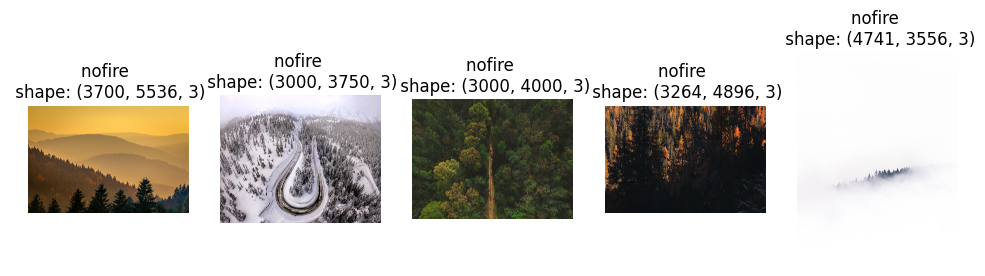

In [25]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

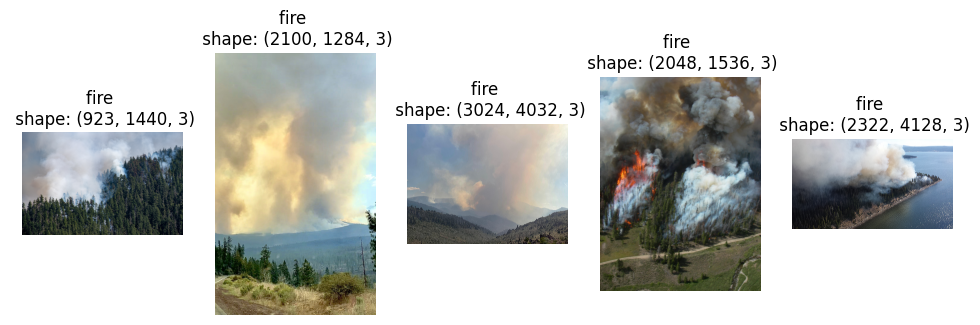

In [26]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [20]:
# Load MobileNetV2 without top layers, with global average pooling
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
base_model.trainable = False  # Freeze the model weights


<ipython-input-20-acfe3f1e8e24>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
IMG_SIZE = (224, 224)  # MobileNetV2 input size

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [29]:
# Extract features for train images
train_features = base_model.predict(train_generator, verbose=1)
train_labels = train_generator.classes

# Extract features for validation images
val_features = base_model.predict(val_generator, verbose=1)
val_labels = val_generator.classes


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/59 ━━━━━━━━━━━━━━━━━━━━ 4:05 7s/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 562s 10s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 115s 9s/step


In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_features, train_labels)


RandomForestClassifier(random_state=42)

In [31]:
val_preds = clf.predict(val_features)
print("this is the results on valid_data")
print(classification_report(val_labels, val_preds))


this is the results on valid_data
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       156
           1       0.82      0.95      0.88       246

    accuracy                           0.85       402
   macro avg       0.86      0.82      0.83       402
weighted avg       0.85      0.85      0.84       402



<Figure size 800x600 with 0 Axes>

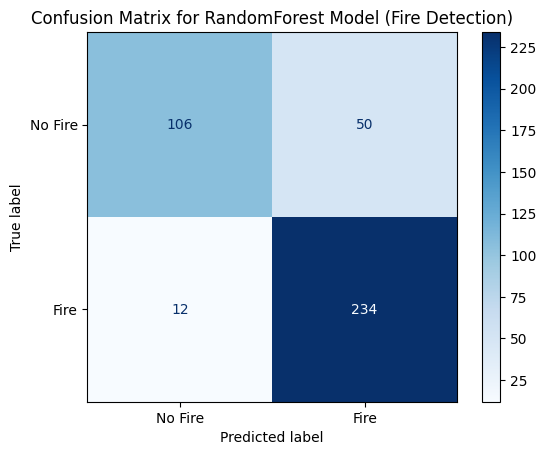

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Predicting on validation set
val_preds = clf.predict(val_features)

# Generating confusion matrix
cm = confusion_matrix(val_labels, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fire', 'Fire'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for RandomForest Model (Fire Detection)")
plt.show()



In [33]:
# Extracting features from the test set using the same base model
test_features = base_model.predict(test_generator, verbose=1)
test_labels = test_generator.classes

# Making predictions on the test set
test_preds = clf.predict(test_features)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 4/13 ━━━━━━━━━━━━━━━━━━━━ 1:02 7s/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 5/13 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 126s 10s/step


In [34]:
from sklearn.metrics import classification_report, accuracy_score

# Generating classification report
print("\nClassification Report on Test Set:")
print(classification_report(test_labels, test_preds, target_names=["No Fire", "Fire"]))

# Calculating accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"\nTest Set Accuracy: {test_accuracy:.4f}")



Classification Report on Test Set:
              precision    recall  f1-score   support

     No Fire       0.92      0.74      0.82       159
        Fire       0.85      0.96      0.90       251

    accuracy                           0.88       410
   macro avg       0.89      0.85      0.86       410
weighted avg       0.88      0.88      0.87       410


Test Set Accuracy: 0.8756


<Figure size 800x600 with 0 Axes>

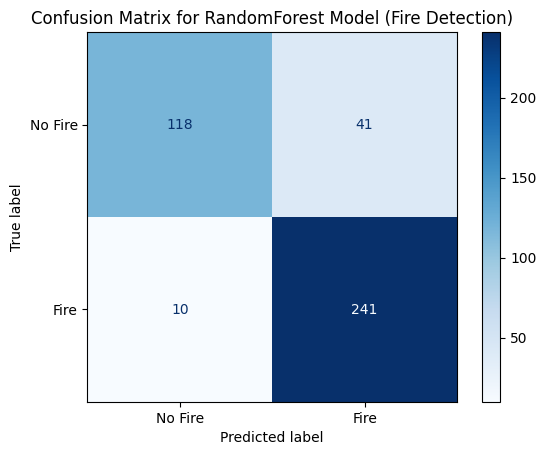

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Predicting on validation set
test_preds = clf.predict(test_features)

# Generating confusion matrix
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fire', 'Fire'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for RandomForest Model (Fire Detection)")
plt.show()



In [ ]:
-os.listdir('/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test/fire')

['36171934502_d220ec0b90_o.jpg',
 '8469662828_371dbcb70d_o.jpg',
 '28020330864_d7a2429a7e_o.jpg',
 '51841108815_6d296388af_o.jpg',
 '29050868872_a81cc9e411_o.jpg',
 '50293973463_065aaf4378_o.jpg',
 '50245620368_2f03cf7055_o.jpg',
 '41870900650_fb240bb4ac_o.jpg',
 '41094811384_1382be1721_o.jpg',
 '27335331950_39b376eddd_o.jpg',
 'matt-palmer-kbTp7dBzHyY-unsplash.jpg',
 '52390588912_3c6e5f2f67_o.jpg',
 '52225751111_53c7f3b819_o.jpg',
 '19196558588_267f24b847_o.jpg',
 '52871129020_848fde461c_o.jpg',
 '36296148516_0a2b440e28_o.jpg',
 'norman-meyer-tai1cTT5eX0-unsplash.jpg',
 '50321123752_d1ae13455a_o.jpg',
 '52231247312_2442b7ef01_o.jpg',
 'malachi-brooks-44Kg_VToFzU-unsplash.jpg',
 '52293502090_77032c6be0_o.jpg',
 '33100052071_1903ff386b_o.jpg',
 '37342469502_36f0ec280c_o.jpg',
 '34549858860_4a9183e9af_o.jpg',
 '50245909001_e383b539af_o.jpg',
 '37325108026_bb99689e1f_o.jpg',
 '52258839816_bbb2d7b2ac_o.jpg',
 '35531872313_eb8772df72_o.jpg',
 '51404893429_95e004cb03_o.jpg',
 '29431355988_ba

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(clf, 'random_forest_model.pkl')



['random_forest_model.pkl']

<ipython-input-39-269f82924cf3>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


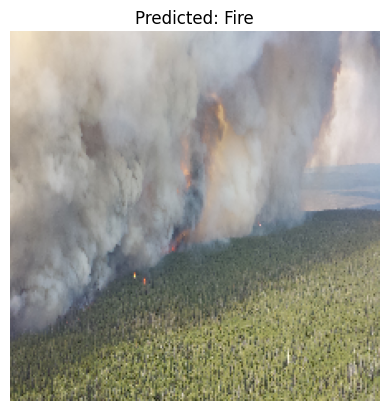

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Load the trained RandomForest model using Joblib
clf = joblib.load('random_forest_model.pkl')

# Load the MobileNetV2 feature extractor (must be the same as used during training)
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
base_model.trainable = False  # Ensure the model is frozen

# Class Names ('fire': 0, 'nofire': 1)
class_names = ['Fire', 'No Fire']

# Function to Predict Fire on a New Image
def predict_fire(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # MobileNetV2 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using MobileNetV2 (same as during training)
    features = base_model.predict(img_array)

    # Predict using RandomForest
    prediction = clf.predict(features)

    # Show the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[int(prediction[0])]}')
    plt.axis('off')
    plt.show()

# Example Usage:
predict_fire('/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test/fire/9573568070_ec00ce554d_o.jpg')  # Replace with your image path
